<h1>Marketing Research Proposal for ABC Hotel & Lodge, first quarter 2017</h1>

For the data source create a research proposal that has:

    Analysis that highlights your experimental hypothesis.
    A rollout plan showing how you would implement and rollout the experiment
    An evaluation plan showing what constitutes success in this experiment

For this Capstone project I used data from a simple A/B test on kaggle. (https://www.kaggle.com/zhangluyuan/ab-testing)
I like the data set because it was very clean and easy to use for this project. The data did not have any description or narrative associated with it on Kaggle, so I crafted one for this assignment based on how I imagined it might play out in real life.

The data measures conversion rates (converting a ad-view to and ad-click) for two different campaigns. The obvious reseach question is did the control group or the treatment group experience a higher rate of conversion?
The null hypothesis being: There will be no difference between the groups. 

What follows is my idea of how such an A/B experiment might play out at the marketing department of a hotel chain.

<h1>Marketing Research Proposal for ABC Hotel & Lodge, first quarter 2017</h1>

<h3>How to increase revenues next quarter?</h3>

Weekly revenue increases year over year have come in below estimates for the past couple months. Although operating
costs decreases have ensured a higher margin, prospects for further margin gains will remain low unless revenue significantly increases. Print and social marketing campaigns have both yielded some results this year, but our online marketing campaigns have fallen flat. It is time to try some new promotions.

Since our Google Ad banners serve as our primary method of customer contact online it is proposed that we focus our campaign there. An alternate banner will be created and approved with new key words focusing on the unique selling propositions that have worked to some effect in the print and social campaigns, the banner will be linked to a new landing page focusing on the same pitches. These are the unique selling propositions that we gained from our customer focus groups. And we believe that they will be effective in increasing conversion rates on the landing page. Conversion rate measures
what percentage of the people who click on the banner purchase a reservation.

<h3>The rollout proposal</h3>

A 50/50 rollout will be conducted for 3 weeks in January 2017. 

All of our affiliate ad banners will be carefully evaluated as to the composition of their audiences by age, gender, spending power, and reason for travel. Two groups of online ad banners will be formed to be as similar as possible and one group will be assigned to new campaign with the new banner and landing page. It is important that the two groups be as similar as possible so that the success of the campaign can be judged solely on the resulting conversion rate. If the groups were different then we may be unable to determine with confidence why the conversion rate changed.

Conversion rates will be measured, aggregated and reported by day. After 3 weeks, the performance of the new landing page will be evaluated. 
	
It is believed that the new landing page will produce a higher conversion rate than the current landing page. All ad click will be recorded and timestamped for analysis.

<h3>How success will be evaluated</h3>

A statistically significant increase in conversion rate for the new landing page as compared to the old landing page for the same time period, will be considered successful and trigger conversion of all ad banners to the new campaign and landing page. 

A statistically significant result is one whose measured effect is large when considering the inherent variablility of the data. The more variable the data is, the higher the measured effect needs to be to draw a conclusion on the difference between two groups. 

This statistical significance is measured by a t-value and a p-value. The t-value measures the difference between the two groups compared to the variability of the data. The p-value gives us the probability of getting that t-value. If the chances of getting the resulting t-value (as measured by the p-value), we can be much more confident that the results were not due to chance.

A p-value of less than 0.05 will signal success.

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#import data

df = pd.read_csv('source.csv')

<h4>Here is a peak at the data</h4>

In [3]:
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [4]:
#To facilitate statistical operation, the group column will be converted to a numerical binary 
#format: 1 for treatment, 0 for control

group_column = pd.Series(df['group'])

group_column = group_column.str.replace('control', '0')
group_column = group_column.str.replace('treatment', '1')

group_column = pd.to_numeric(group_column)

df['group'] = group_column

In [5]:
# How large is each group?
print('treatment sample size:', len(df[df.group == 1]))
print('control sample size:', len(df[df.group == 0]))
print('test proportion:', df.group.mean())
print()

# What is the signup rate of treatment and control?
print('treatment conversion rate:', df[df.group == 1].converted.mean())
print('control conversion rate:', df[df.group == 0].converted.mean())

# Are the treatment and control groups significantly different?
stats.ttest_ind(df[df.group == 1].converted,
                df[df.group == 0].converted)

treatment sample size: 147276
control sample size: 147202
test proportion: 0.5001256460584492

treatment conversion rate: 0.11891957956489856
control conversion rate: 0.12039917935897611


Ttest_indResult(statistic=-1.2369207675839395, pvalue=0.21611748562490837)

In [6]:
#Can the timestamp provide any insight?

#Lets examine conversion rates by date

#First we need to convert the timestamp to a date
timestamp = pd.Series(df['timestamp'])

timestamp_split = timestamp.str.split(' ', expand=True)
dates = timestamp_split[0]

df['timestamp'] = dates

<h4>Reults are not looking good, lets break them up by day to see if we can see a pattern.</h4>

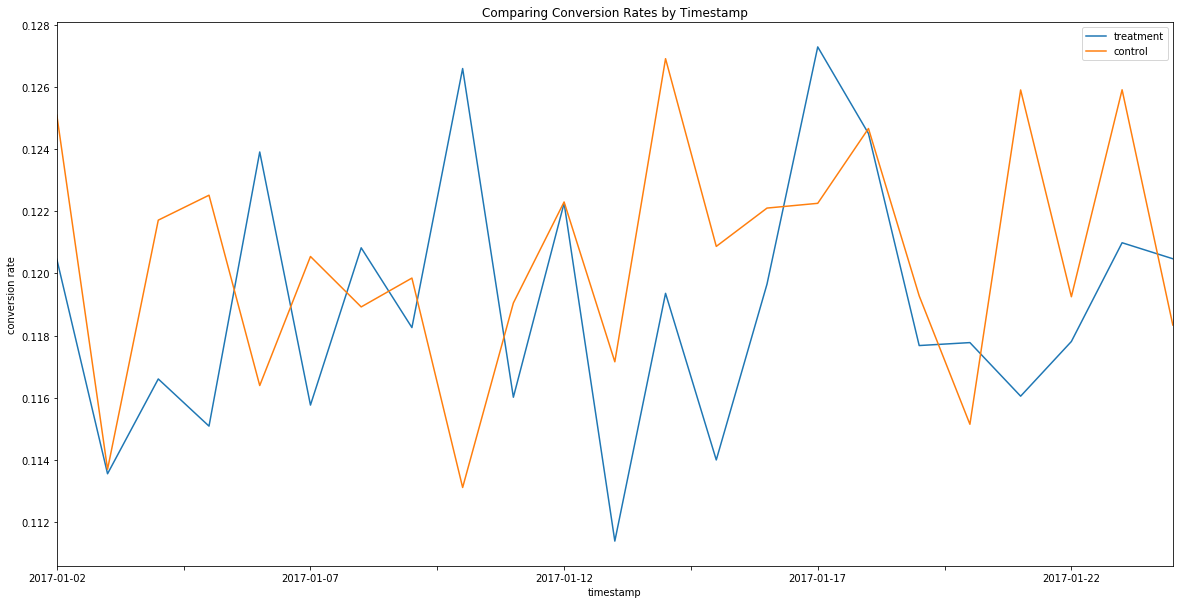

T-Test Results by Date
Ttest_indResult(statistic=-1.7513349588947071, pvalue=0.07991098291172641)
Ttest_indResult(statistic=-0.006602247000174421, pvalue=0.9947323061941296)
Ttest_indResult(statistic=-0.5475732549425983, pvalue=0.5839939761650113)
Ttest_indResult(statistic=0.34053589737971707, pvalue=0.7334582686859765)
Ttest_indResult(statistic=2.4107394299711413, pvalue=0.01593347205307105)
Ttest_indResult(statistic=-0.2848920790137238, pvalue=0.7757312634631253)
Ttest_indResult(statistic=0.8779288132527007, pvalue=0.3799981866652523)
Ttest_indResult(statistic=-0.9078527160587373, pvalue=0.3639725133791315)
Ttest_indResult(statistic=-1.235855294717702, pvalue=0.21653394534429107)
Ttest_indResult(statistic=-0.02812015795279188, pvalue=0.9775667391524729)
Ttest_indResult(statistic=-0.2847267065405686, pvalue=0.7758579161466783)
Ttest_indResult(statistic=-0.25773727132699437, pvalue=0.7966136308790106)
Ttest_indResult(statistic=0.285188077697393, pvalue=0.7755078910855202)
Ttest_indResu

In [14]:
fig = df[df.group==1][
    ['timestamp', 'converted']].groupby('timestamp').mean().plot(figsize=(20,10))
df[df.group==0][
    ['timestamp', 'converted']].groupby('timestamp').mean().plot(ax=fig)
plt.legend(['treatment','control'])
plt.ylabel('conversion rate')
plt.title('Comparing Conversion Rates by Timestamp')

plt.show()


# Generate a test statistic comparing treatment and control by date
print('T-Test Results by Date')

for date in df.timestamp.unique():
    dated_data = df[df.timestamp == date]
    print(stats.ttest_ind(dated_data[dated_data.group == 1].converted,
                          dated_data[dated_data.group == 0].converted))

Although there seems to be a pattern where the control group performs better on weekends and the treatment group performs better mid-week, the difference is only superficial and does not approach statistical significance.

<h3>Results</h3>

The difference between the two groups is not statistically significant, and the new campaign may, in fact, have had a lower
conversion rate than the old campaign. Only a couple of days reached statistically significant different conversion rate levels, and not in a uniform direction.

It is recommended that marketing return to focus group and customer satisfaction studies to prepare for a new campaign. 